In [1]:
%matplotlib widget
import sympy as sp
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
# import ipyvolume as ipv
import ipywidgets as ipw
sp.init_printing()

In [36]:
sigma_t_n1 = sp.symbols('\sigma_{\mathrm{T}_{n+1}}')
sigma_t_n1_trial = sp.symbols('\overline{\sigma}_{\mathrm{T}_{n+1}}')
omega_t_n1 = sp.symbols('\omega_{\mathrm{T}_{n+1}}')
epsilon_p_t_n1 = sp.symbols('\epsilon^p_{\mathrm{T}_{n+1}}')
epsilon_p_t_n = sp.symbols('\epsilon^p_{\mathrm{T}_{n}}')
epsilon_t_n1 = sp.symbols('\epsilon_{\mathrm{T}_{n+1}}')
E_t = sp.symbols('E_{\mathrm{T}}')
gamma = sp.symbols('\gamma')
alpha_n = sp.symbols('alpha_n')
K = sp.symbols('K')
p = sp.symbols('p')
z_n = sp.symbols('z_n')

In [3]:
omega_t_n = sp.symbols('\omega_{\mathrm{T}_{n}}')
delta_lambda = sp.symbols('\Delta\lambda')
c = sp.symbols('c')
sigma_bar = sp.symbols('\overline{\sigma_{\mathrm{T}}}')
sigma_n_n = sp.symbols('\sigma_{\mathrm{N}_{n}}')
Y_t_n1 = sp.symbols('Y_{\mathrm{T}_{n+1}}')
S = sp.symbols('S')
m = sp.symbols('m')
r = sp.symbols('r')

## Tangential direction

In [31]:
sigma_t_n1_trial_ = E_t * (epsilon_t_n1 - epsilon_p_t_n)
sigma_t_n1_trial_

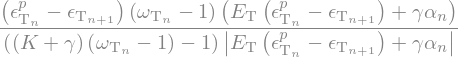

In [40]:
# delta_lambda_ = (abs(E_t * (epsilon_t_n1 - epsilon_p_t_n) - gamma * alpha_n ) - K * z_n - sigma_bar + m * sigma_n_n ) / \
# (E_t / (1 - omega_t_n) + gamma + K)
# delta_lambda_ 

delta_lambda_ = ((epsilon_t_n1 - epsilon_p_t_n) * (sigma_t_n1_trial_ - gamma * alpha_n)/abs(sigma_t_n1_trial_ - gamma * alpha_n)) / \
(1 / (1 - omega_t_n) + gamma + K)
delta_lambda_ = sp.simplify(delta_lambda_)
delta_lambda_ 

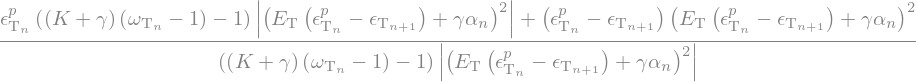

In [47]:
epsilon_p_t_n1_ = epsilon_p_t_n + (delta_lambda_ / (1 - omega_t_n)) * (sigma_t_n1_trial_ - gamma * alpha_n)/abs(sigma_t_n1_trial_ - gamma * alpha_n)
epsilon_p_t_n1_ = sp.simplify(epsilon_p_t_n1_)
epsilon_p_t_n1_

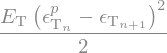

In [44]:
Y_t_n1_ = sp.Rational(1,2) * E_t * (epsilon_t_n1 - epsilon_p_t_n)**2
sp.simplify(Y_t_n1_)

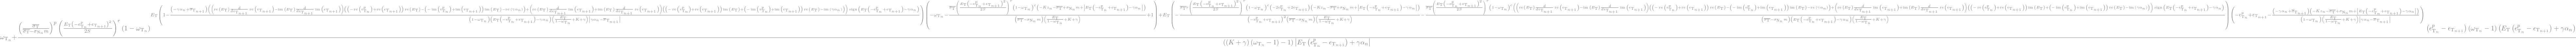

In [45]:
omega_t_n1_ = omega_t_n + delta_lambda_ * (1 - omega_t_n) ** c * (sigma_bar/(sigma_bar - m*sigma_n_n))**p * (Y_t_n1_/S)**r
omega_t_n1_

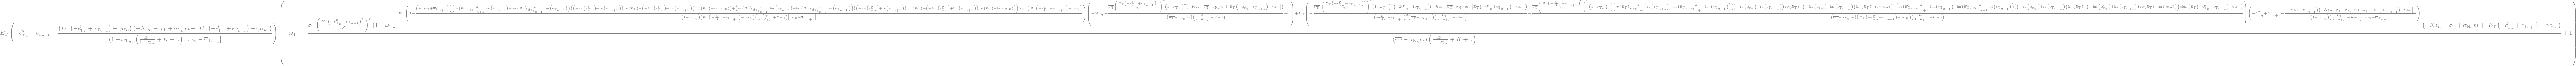

In [24]:
sigma_t_n1_ = (1 - omega_t_n1_) * E_t * (epsilon_t_n1 - epsilon_p_t_n1_)
sigma_t_n1_

In [28]:
c_T = sigma_t_n1_.diff(epsilon_t_n1)

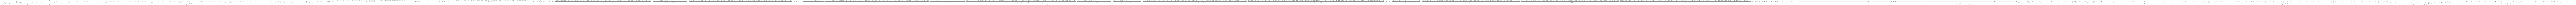

In [29]:
c_T